<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [2]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [43]:
!pip install yfinance
!pip install bs4
!pip install nbformat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [85]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go

from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [88]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [92]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [97]:
tesla = yf.Ticker('TSLA')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [100]:
tesla_data = tesla.history(period="max")

# Display the first few rows of the DataFrame
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [103]:
# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)
print('done')

done


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [107]:

# Define the URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text

# Print the first 500 characters of html_data to verify
print(html_data[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [109]:
from bs4 import BeautifulSoup
import requests

# Step 2: Retrieve HTML Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.content

# Step 3: Parse HTML Data Using BeautifulSoup with 'html.parser'
soup = BeautifulSoup(html_data, "html.parser")

# Step 4: Extract Data (Example: Print the title of the page)
print(soup.title.text)

Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [115]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Step 1: Fetch and Parse HTML Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.content

soup = BeautifulSoup(html_data, "html.parser")

# Step 2: Find All Tables
tables = soup.find_all('table')

# Step 3: Identify the Relevant Table
tesla_revenue_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue_table = table
        break

# Step 4: Initialize a DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 5: Loop Through Rows and Extract Data
if tesla_revenue_table:
    rows = tesla_revenue_table.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        if len(cols) >= 2:  # Ensure there are at least two columns
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()

            # Step 6: Clean Revenue Data
            revenue = revenue.replace('$', '').replace(',', '')

            # Step 7: Add Rows to DataFrame
            new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
            tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

# Print the resulting DataFrame
print(tesla_revenue)

          Date Revenue
0   2022-09-30   21454
1   2022-06-30   16934
2   2022-03-31   18756
3   2021-12-31   17719
4   2021-09-30   13757
5   2021-06-30   11958
6   2021-03-31   10389
7   2020-12-31   10744
8   2020-09-30    8771
9   2020-06-30    6036
10  2020-03-31    5985
11  2019-12-31    7384
12  2019-09-30    6303
13  2019-06-30    6350
14  2019-03-31    4541
15  2018-12-31    7226
16  2018-09-30    6824
17  2018-06-30    4002
18  2018-03-31    3409
19  2017-12-31    3288
20  2017-09-30    2985
21  2017-06-30    2790
22  2017-03-31    2696
23  2016-12-31    2285
24  2016-09-30    2298
25  2016-06-30    1270
26  2016-03-31    1147
27  2015-12-31    1214
28  2015-09-30     937
29  2015-06-30     955
30  2015-03-31     940
31  2014-12-31     957
32  2014-09-30     852
33  2014-06-30     769
34  2014-03-31     621
35  2013-12-31     615
36  2013-09-30     431
37  2013-06-30     405
38  2013-03-31     562
39  2012-12-31     306
40  2012-09-30      50
41  2012-06-30      27
42  2012-03

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [118]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [121]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [124]:
# Display the last 5 rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [128]:
# Import the necessary library
import yfinance as yf

# Create a Ticker object for GameStop
gme_ticker = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [131]:
# Extract stock information for the maximum period
gme_data = gme_ticker.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [134]:
# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [138]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [140]:
# Step 2: Parse the HTML
soup = BeautifulSoup(html_data_2, 'html.parser')  # or 'html5lib'

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [79]:
# Step 3: Find all tables and locate the one with GameStop Revenue
tables = soup.find_all('table')
gme_revenue_table = None

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_revenue_table = table
        break

# Convert the table to a DataFrame
gme_revenue = pd.read_html(str(gme_revenue_table))[0]

# Rename columns to 'Date' and 'Revenue'
gme_revenue.columns = ["Date", "Revenue"]

# Step 4: Clean the Revenue data
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True).astype(float)

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [77]:
# Step 5: Display the last five rows
print(gme_revenue.tail())

          Date  Revenue
57  2006-01-31   1667.0
58  2005-10-31    534.0
59  2005-07-31    416.0
60  2005-04-30    475.0
61  2005-01-31    709.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


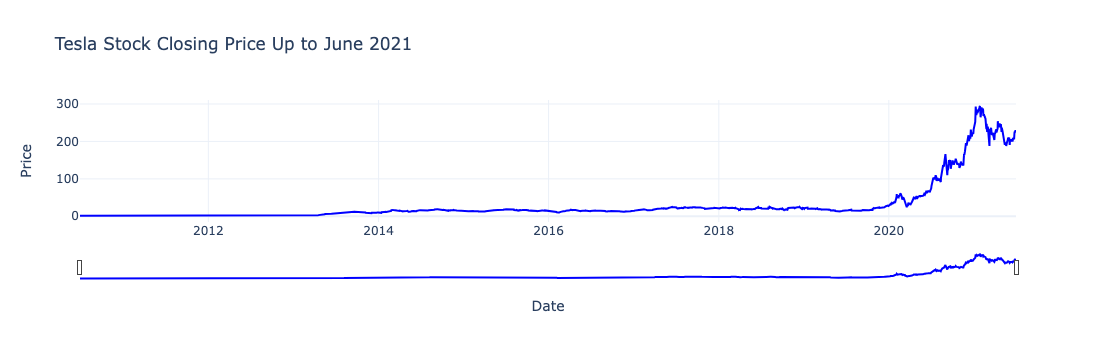

         Date  Revenue
57 2006-01-31     1667
58 2005-10-31      534
59 2005-07-31      416
60 2005-04-30      475
61 2005-01-31      709


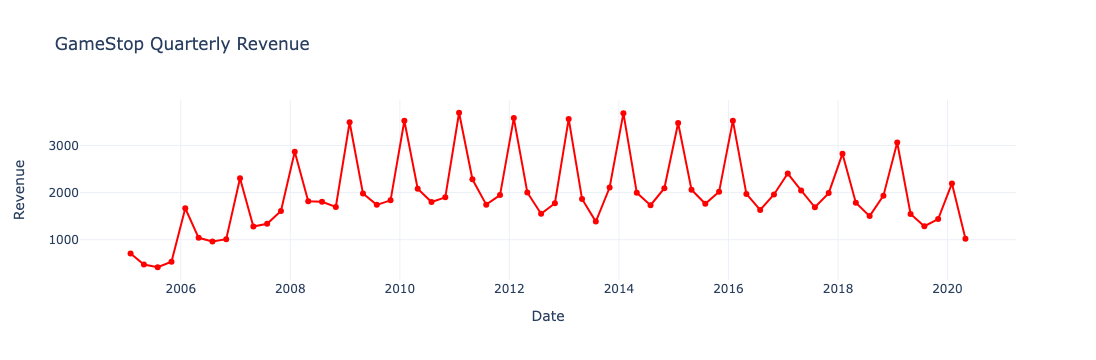

In [77]:
import yfinance as yf
import plotly.graph_objects as go

# Fetch Tesla stock data
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period="max")

# Filter data up to June 30, 2021
tesla_data = tesla_data[tesla_data.index <= '2021-06-30']

# Define the function to plot stock data
def make_graph(df, title):
    # Create the figure
    fig = go.Figure()

    # Add a trace for the closing price
    fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price', line=dict(color='blue')))

    # Update the layout of the figure
    fig.update_layout(
        title=title,
        xaxis_title='Date',
        yaxis_title='Price',
        xaxis_rangeslider_visible=True,
        template='plotly_white'
    )

    # Show the figure
    fig.show()

# Define the title for the graph
title = 'Tesla Stock Closing Price Up to June 2021'

# Create the graph
make_graph(tesla_data, title)

import requests
import pandas as pd
from bs4 import BeautifulSoup
import plotly.graph_objects as go

# Define a function to plot the revenue data
def plot_revenue_graph(revenue_data, title):
    # Create the figure
    fig = go.Figure()

    # Add a trace for the revenue data as a line graph with red color
    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'], mode='lines+markers', name='Quarterly Revenue', line=dict(color='red')))

    # Update the layout of the figure
    fig.update_layout(
        title=title,
        xaxis_title='Date',
        yaxis_title='Revenue',
        template='plotly_white'
    )

    # Show the figure
    fig.show()

# Load GameStop revenue data from the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

# Parse the HTML data
soup = BeautifulSoup(html_data_2, 'html.parser')

# Extract the table with GameStop revenue data
tables = soup.find_all('table')
for table in tables:
    if 'GameStop Quarterly Revenue' in table.get_text():
        gme_revenue_table = table
        break

# Create an empty DataFrame for GameStop revenue
gme_revenue_list = []

# Loop through rows and extract the data
for row in gme_revenue_table.find_all('tr')[1:]:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    gme_revenue_list.append({'Date': date, 'Revenue': revenue})

# Convert list to DataFrame
gme_revenue = pd.DataFrame(gme_revenue_list)

# Convert 'Date' to datetime format and 'Revenue' to numeric
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

# Check the last few rows of gme_revenue
print(gme_revenue.tail())

# Plot the revenue graph with a red line
plot_revenue_graph(gme_revenue, 'GameStop Quarterly Revenue')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


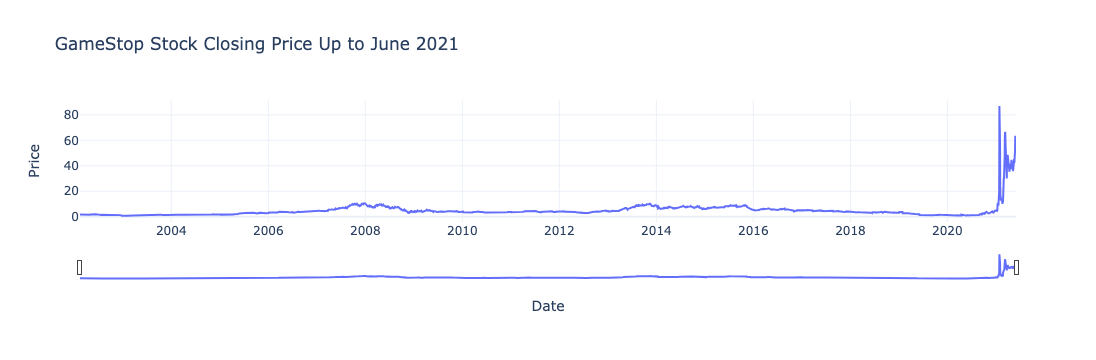

         Date  Revenue
57 2006-01-31     1667
58 2005-10-31      534
59 2005-07-31      416
60 2005-04-30      475
61 2005-01-31      709


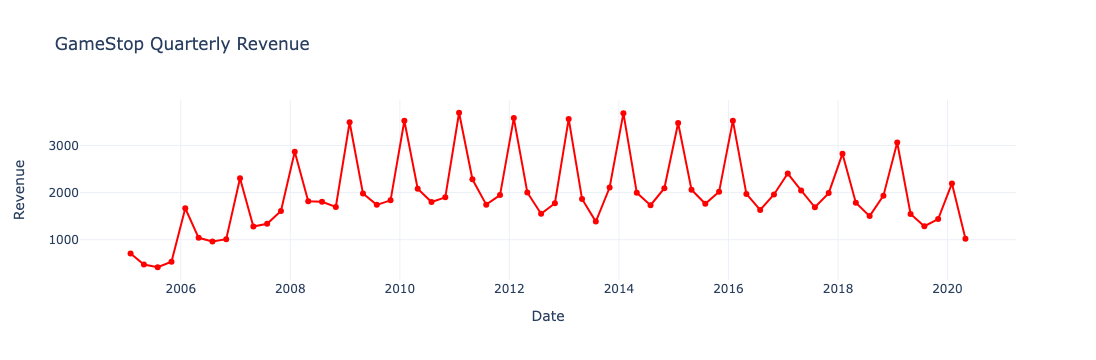

In [69]:
import yfinance as yf
import plotly.graph_objects as go

# Fetch Tesla stock data
gamestop = yf.Ticker('GME')
gamestop_data = gamestop.history(period="max")

# Filter data up to June 30, 2021
gamestop_data = gamestop_data[gamestop_data.index <= '2021-06']

# Define the make_graph function
def make_graph(df, title):
    # Create the figure
    fig = go.Figure()

    # Add a trace for the closing price
    fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price'))

    # Update the layout of the figure
    fig.update_layout(
        title=title,
        xaxis_title='Date',
        yaxis_title='Price',
        xaxis_rangeslider_visible=True,
        template='plotly_white'
    )

    # Show the figure
    fig.show()

# Define the title for the graph
title = 'GameStop Stock Closing Price Up to June 2021'

# Create the graph
make_graph(gamestop_data, title)

import requests
import pandas as pd
from bs4 import BeautifulSoup
import plotly.graph_objects as go

# Define a function to plot the revenue data
def plot_revenue_graph(revenue_data, title):
    # Create the figure
    fig = go.Figure()

    # Add a trace for the revenue data as a line graph with red color
    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'], mode='lines+markers', name='Quarterly Revenue', line=dict(color='red')))

    # Update the layout of the figure
    fig.update_layout(
        title=title,
        xaxis_title='Date',
        yaxis_title='Revenue',
        template='plotly_white'
    )

    # Show the figure
    fig.show()

# Load GameStop revenue data from the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

# Parse the HTML data
soup = BeautifulSoup(html_data_2, 'html.parser')

# Extract the table with GameStop revenue data
tables = soup.find_all('table')
for table in tables:
    if 'GameStop Quarterly Revenue' in table.get_text():
        gme_revenue_table = table
        break

# Create an empty DataFrame for GameStop revenue
gme_revenue_list = []

# Loop through rows and extract the data
for row in gme_revenue_table.find_all('tr')[1:]:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    gme_revenue_list.append({'Date': date, 'Revenue': revenue})

# Convert list to DataFrame
gme_revenue = pd.DataFrame(gme_revenue_list)

# Convert 'Date' to datetime format and 'Revenue' to numeric
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

# Check the last few rows of gme_revenue
print(gme_revenue.tail())

# Plot the revenue graph with a red line
plot_revenue_graph(gme_revenue, 'GameStop Quarterly Revenue')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
